# 19AI705 Applied Predictive Analytics 

### Evaluation Lab 5 : ARIMA


#### Athul Mathew CB.EN.P2AID20016

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/toshihiroryuu/Dataset-test/main/AirPassengers.csv"
 
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])

df.describe()

Size of the data frame is 144
Shape of the data frame is (144, 1)
No of Rows =  144
No of Columns =  1


,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Preprocessing

#### Check for missing values

In [4]:
import missingno as msno
# ! pip install missingno

miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


#### Rename coulmn headers

In [5]:
df = df.rename(columns={'#Passengers': 'Passengers'})
df.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 1.	Carry out EDA

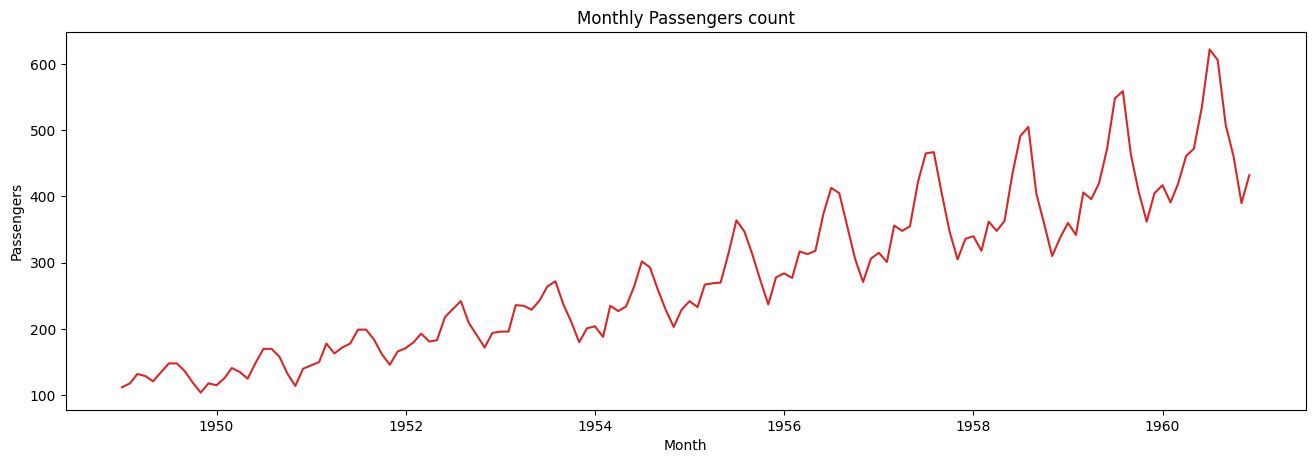

In [6]:
import matplotlib.pyplot as plt 

def plot_df(df, x, y, title="", xlabel='Month', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x = df.index, y=df["Passengers"], title='Monthly Passengers count') 

In [7]:
df = pd.read_csv(url, parse_dates=['Month'])
df = df.rename(columns={'#Passengers': 'Passengers'})

x = df['Month'].values
y1 = df['Passengers'].values

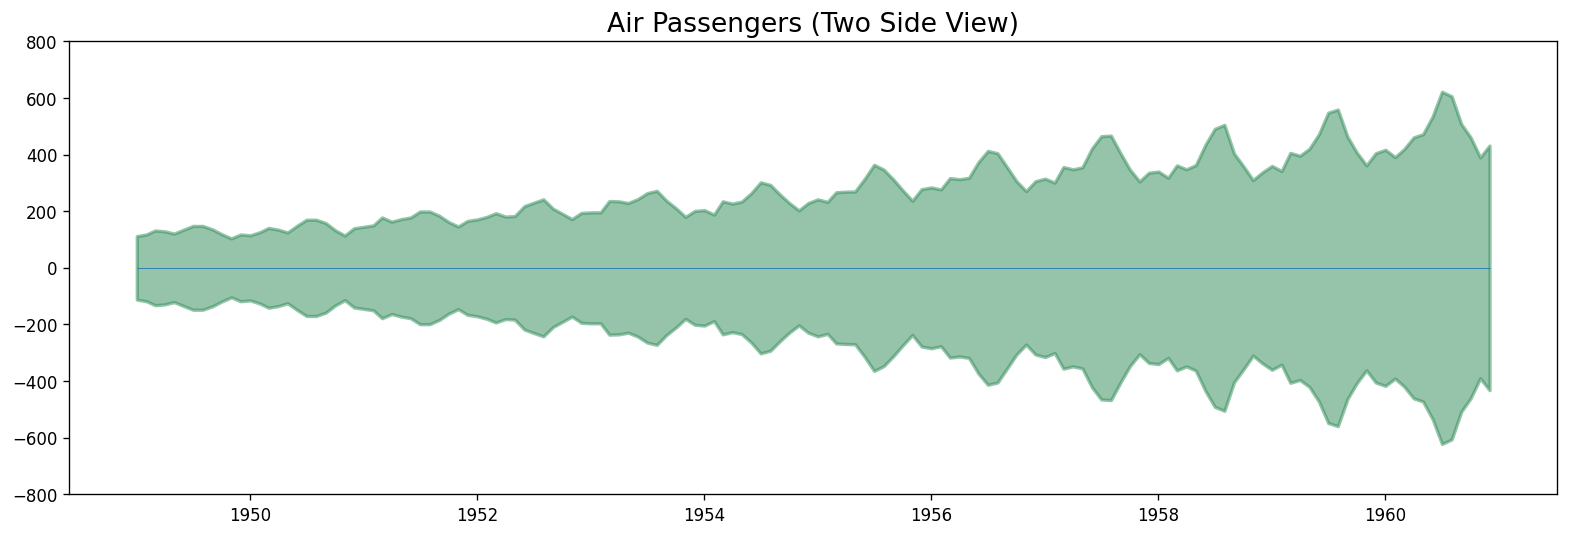

In [8]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)

plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Month), xmax=np.max(df.Month), linewidth=.5)
plt.show()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (144, 2)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
  

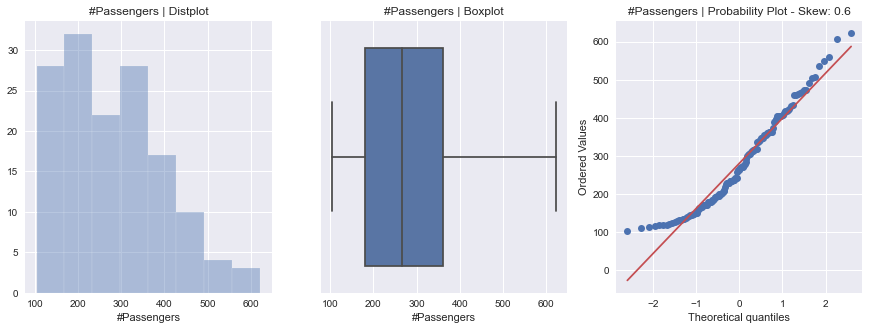

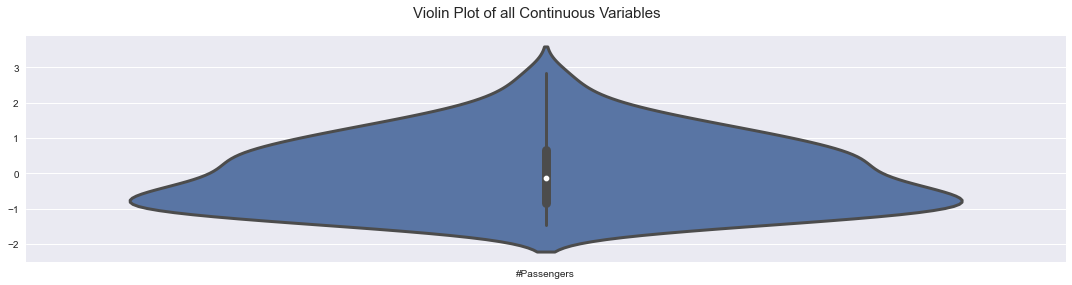

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 1.088

 ###################### VISUALIZATION Completed ########################


In [9]:
# ! pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

dff = AV.AutoViz(url)

                                             |          | [  0%]   00:00 -> (? left)


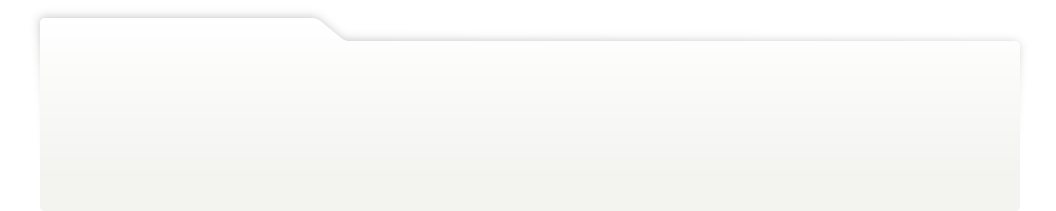
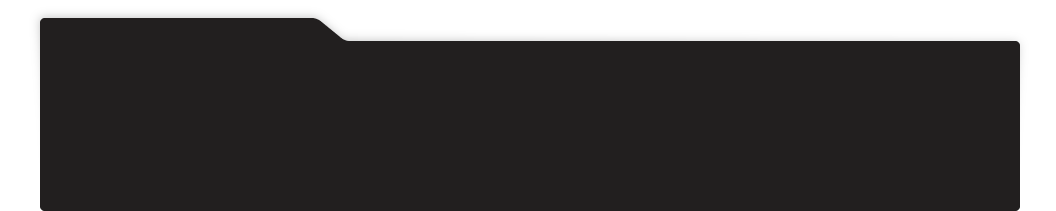
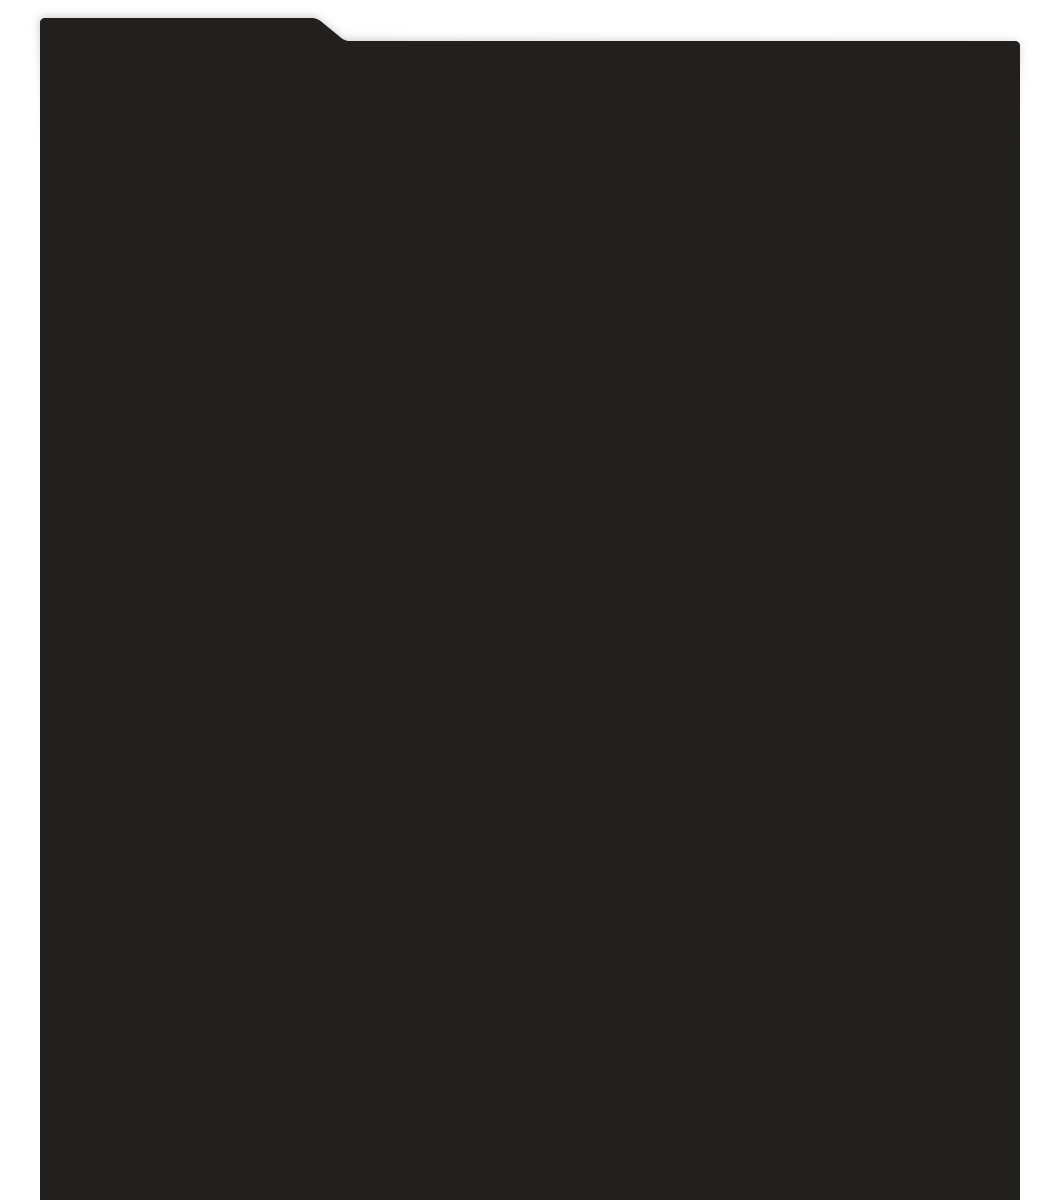
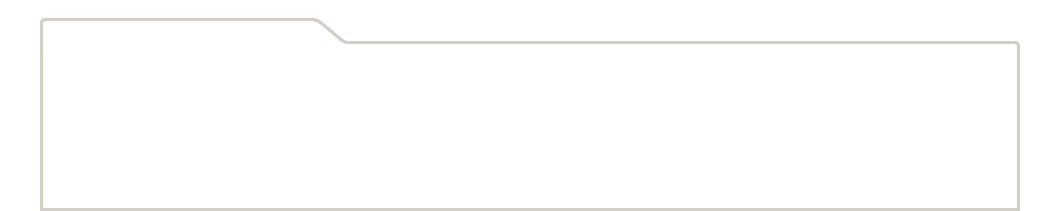
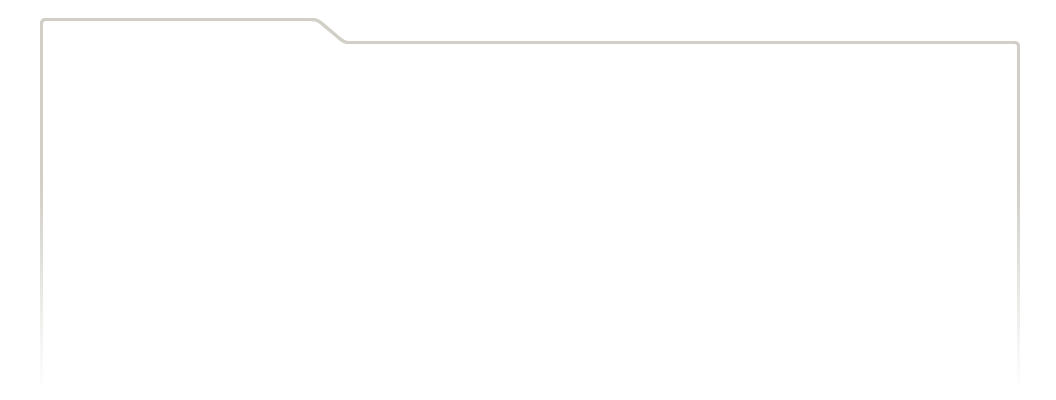
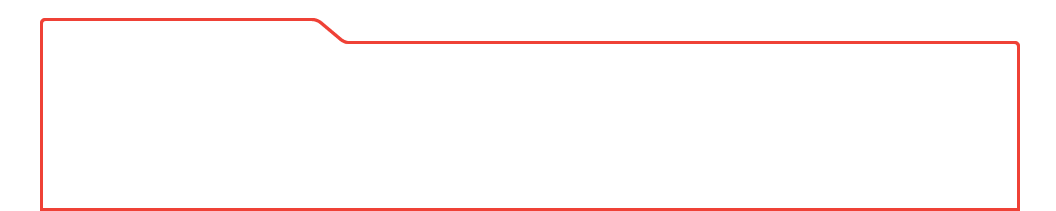
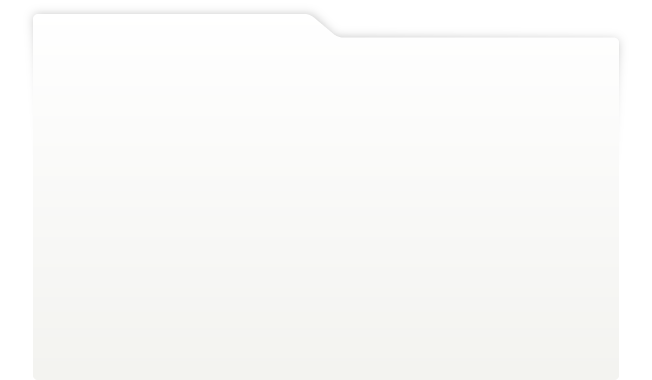
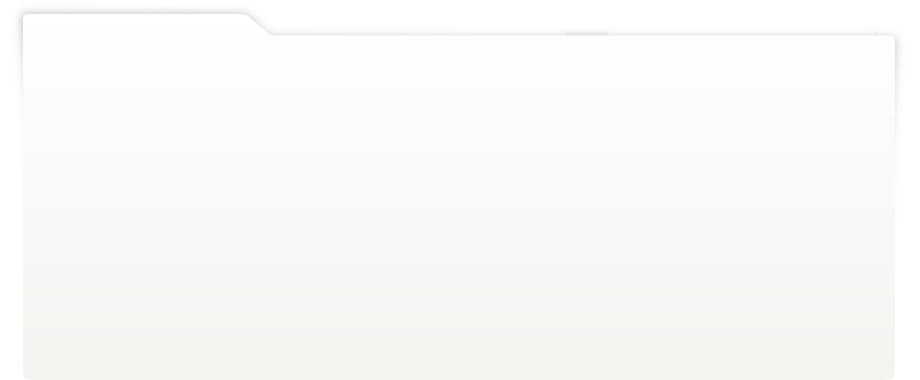
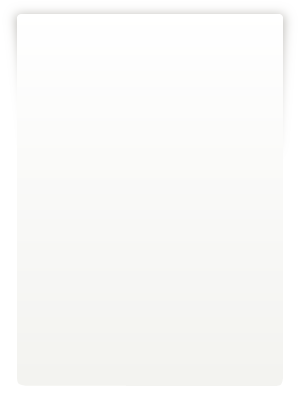
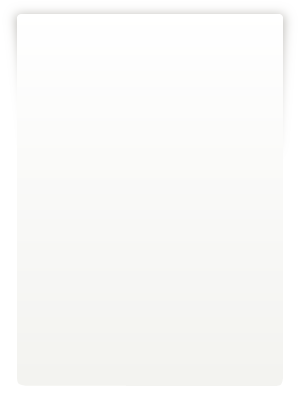
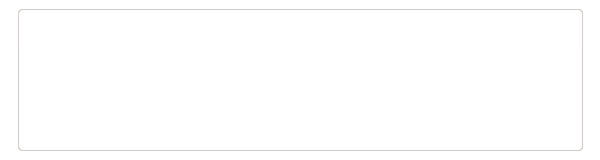
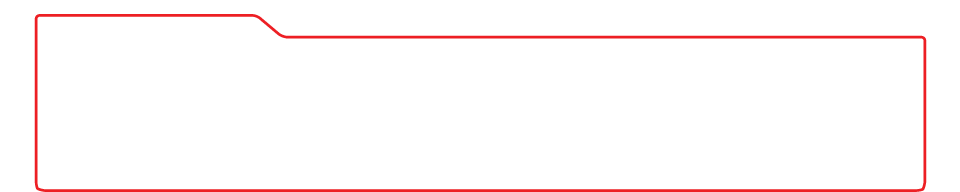
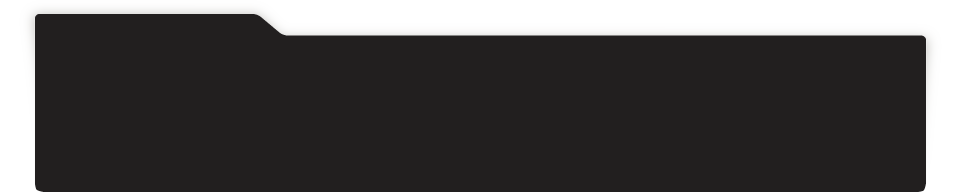
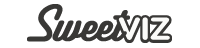
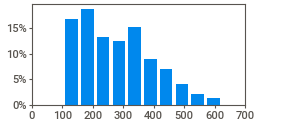
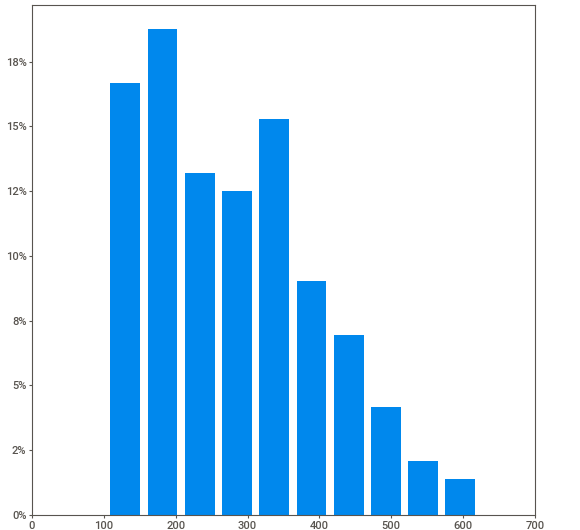
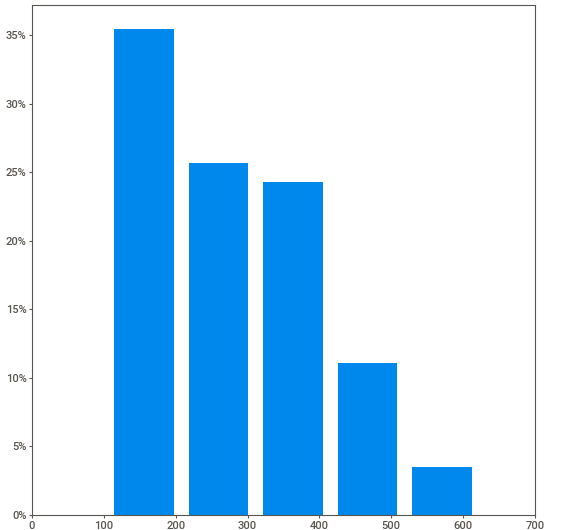
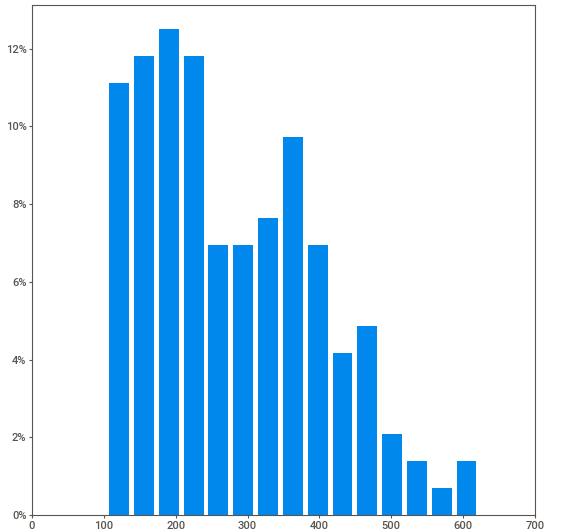
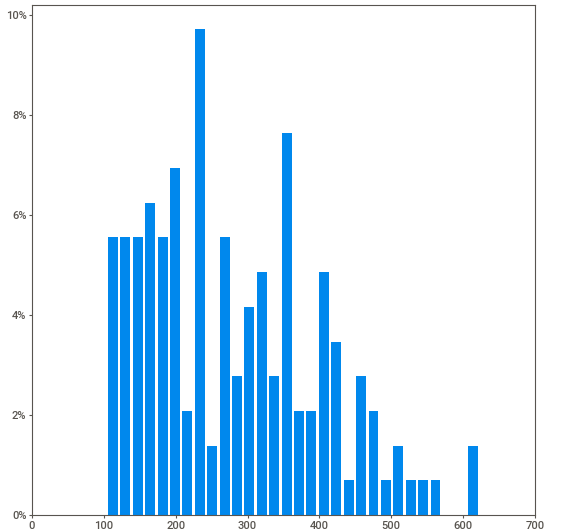
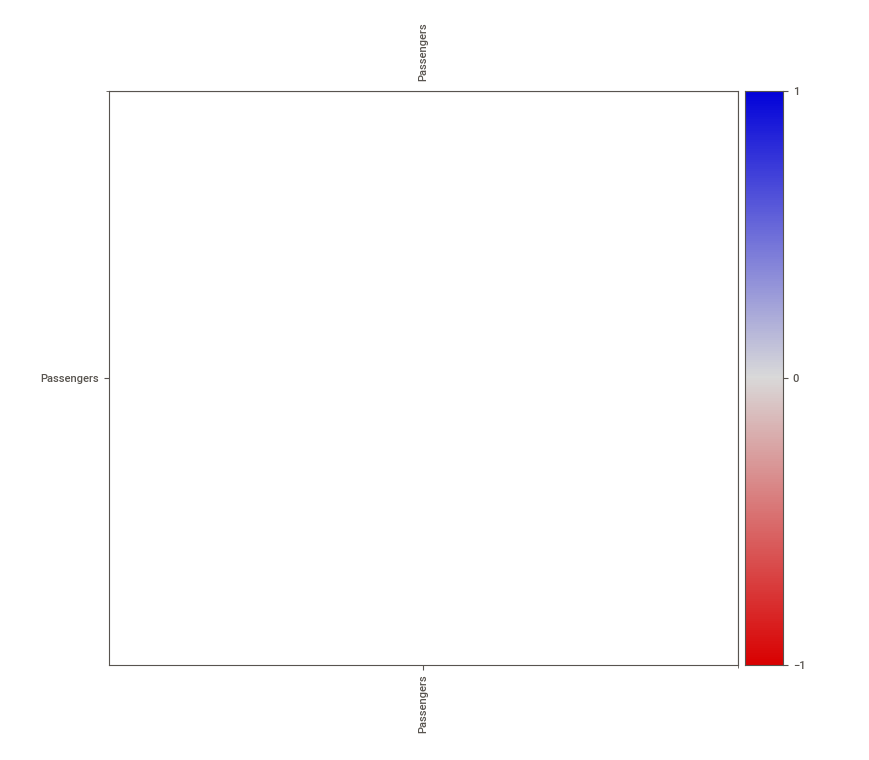
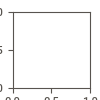

In [10]:
# ! pip install sweetviz

import sweetviz as sv

report = sv.analyze(df)

# report.show_html('Purchase Trend.html')
report.show_notebook(w=None, h=None, scale=None,layout='widescreen',filepath=None)

## 2. Analyze if there is trend or seasonality in the data

In [11]:
df['year'] = [d.year for d in df.Month]
df['month'] = [d.strftime('%b') for d in df.Month]
years = df['year'].unique()
df.head(2)

,Month,Passengers,year,month
0,1949-01-01,112,1949,Jan
1,1949-02-01,118,1949,Feb


In [12]:
import matplotlib as mpl

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

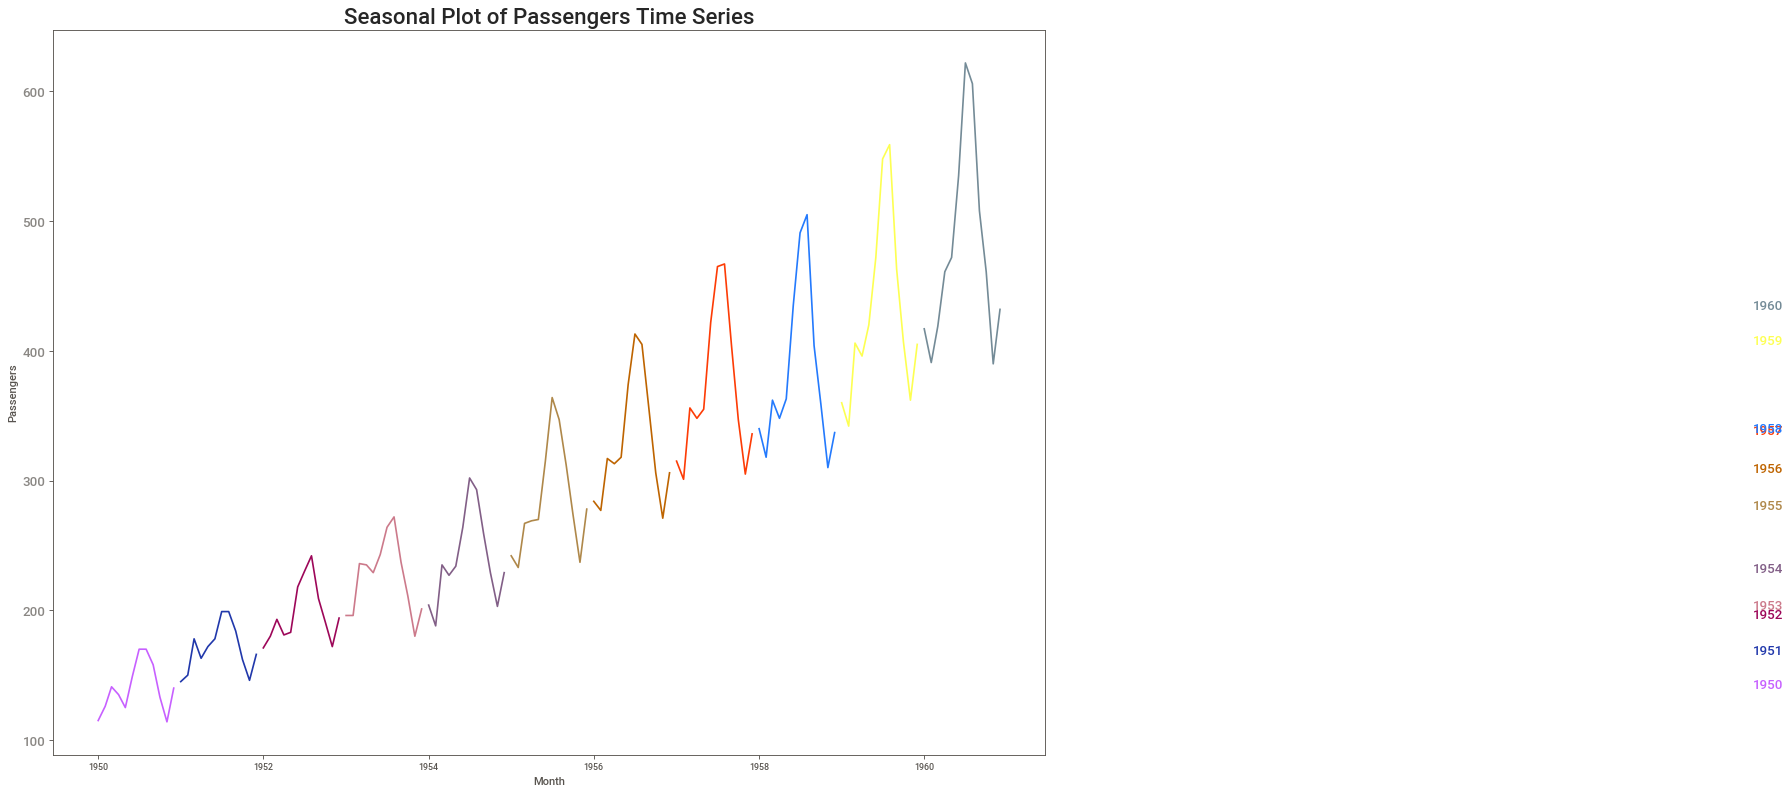

In [13]:
plt.figure(figsize=(16,12), dpi= 80)

for i, y in enumerate(years):
    if i > 0:        
        plt.plot('Month', 'Passengers', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'Passengers'][-1:].values[0], y, fontsize=12, color=mycolors[i])
        
plt.gca().set(ylabel='Passengers', xlabel='Month')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Passengers Time Series", fontsize=20)
plt.show()

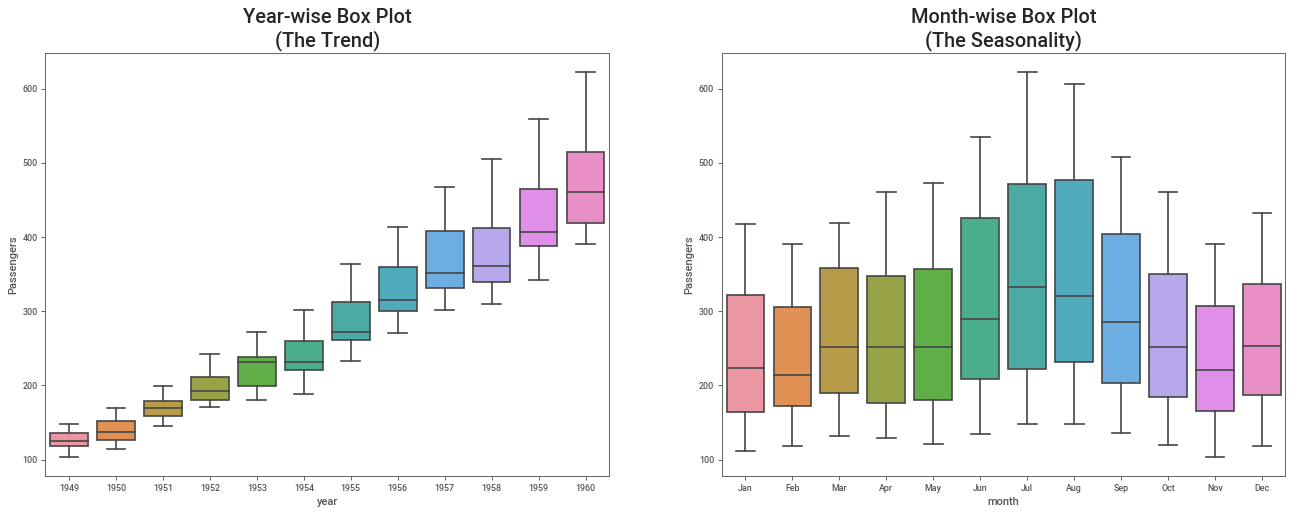

In [14]:
import seaborn as sns

df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.reset_index(inplace=True)
df = df.rename(columns={'#Passengers': 'Passengers'})

df['year'] = [d.year for d in df.Month]
df['month'] = [d.strftime('%b') for d in df.Month]
years = df['year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Passengers', data=df, ax=axes[0])
sns.boxplot(x='month', y='Passengers', data=df.loc[~df.year.isin([1991, 2008]), :])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

It is evident that we have seasonality and trend in the data from the above graph.

## 3. Check for stationarity – Carry out ADF test

In [15]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(url, parse_dates=['Month'])
df = df.rename(columns={'#Passengers': 'Passengers'})

result = adfuller(df.Passengers.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060433
p-value: 0.9918802434376409
Critial Values:
   1%, -3.4816817173418295
Critial Values:
   5%, -2.8840418343195267
Critial Values:
   10%, -2.578770059171598


Since p-value(0.99) is higher than significance level(0.05), the time series possesses a unit root and is non-stationary.

### 4. Find a suitable degree of differencing (d).

In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

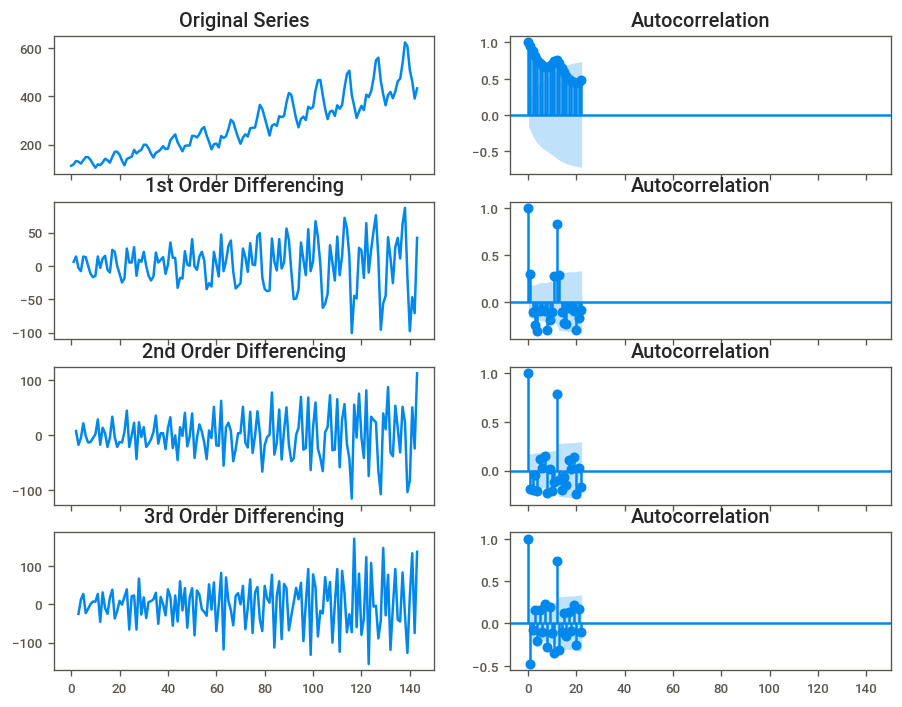

In [17]:
df = pd.read_csv(url, parse_dates=['Month'])
df = df.rename(columns={'#Passengers': 'Passengers'})

fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.Passengers); axes[0, 0].set_title('Original Series')
plot_acf(df.Passengers, ax=axes[0, 1])

axes[1, 0].plot(df.Passengers.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Passengers.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df.Passengers.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Passengers.diff().diff().dropna(), ax=axes[2, 1])

axes[3, 0].plot(df.Passengers.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.Passengers.diff().diff().diff().dropna(), ax=axes[3, 1])

plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Passengers.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.829267
p-value: 0.054213


In [19]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.Passengers.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -16.384232
p-value: 0.000000


The time series reaches stationarity with two orders of differencing. Since p-value of first order differnceing is 0.05, 
we can choose the order of differncing to be 1 for now.

## 5. Suggest suitable values of p and q (AR and MA parameters) respectively.

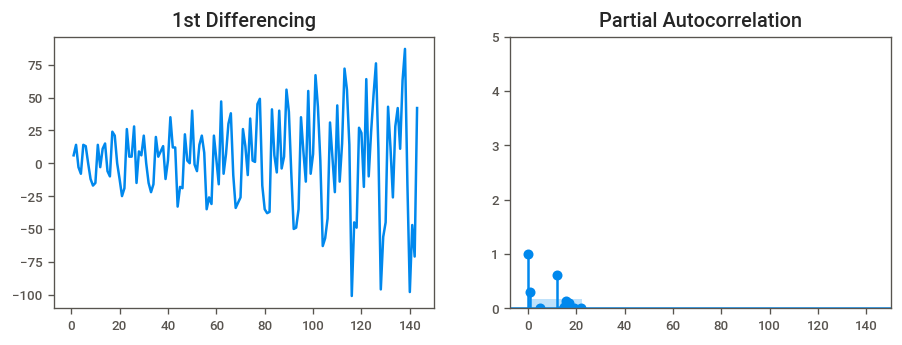

In [20]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Passengers.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Passengers.diff().dropna(), ax=axes[1])

plt.show()

The PACF lag 1 is quite significant and is well above the significance line.Lets fix the p as 1.

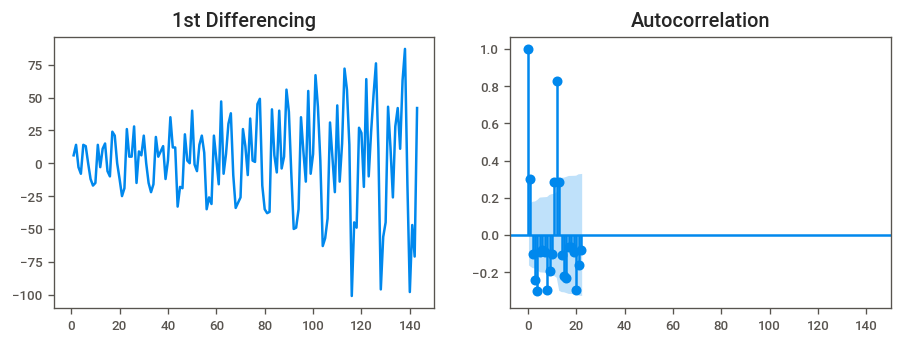

In [21]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

df = pd.read_csv(url, header=0)
df = df.rename(columns={'#Passengers': 'Passengers'})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Passengers.diff()); axes[0].set_title('1st Differencing')
plot_acf(df.Passengers.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the lag.

## 6. Carry out the ARIMA test and comment on the results

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Passengers, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -680.908
Method:                       css-mle   S.D. of innovations             27.910
Date:                Fri, 11 Jun 2021   AIC                           1371.815
Time:                        07:25:10   BIC                           1386.630
Sample:                             1   HQIC                          1377.835
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6527      0.181     14.649      0.000       2.298       3.008
ar.L1.D.Passengers     0.5167      0.098      5.262      0.000       0.324       0.709
ma.L1.D.Passengers  

Here the coefficient of the MA2 term is negative and the P-Value is greater than significance level. It p value should  be less than significance level(0.05) for the respective X to be significant.

In [23]:
# 1,1,1 ARIMA Model
model = ARIMA(df.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Fri, 11 Jun 2021   AIC                           1402.145
Time:                        07:25:11   BIC                           1413.997
Sample:                             1   HQIC                          1406.961
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers  

Comparing AIC values of two models, we can conclude that 1, 1, 2 model is good with slightly reduce AIC value(1371.815).

## 7. Plot the residual error

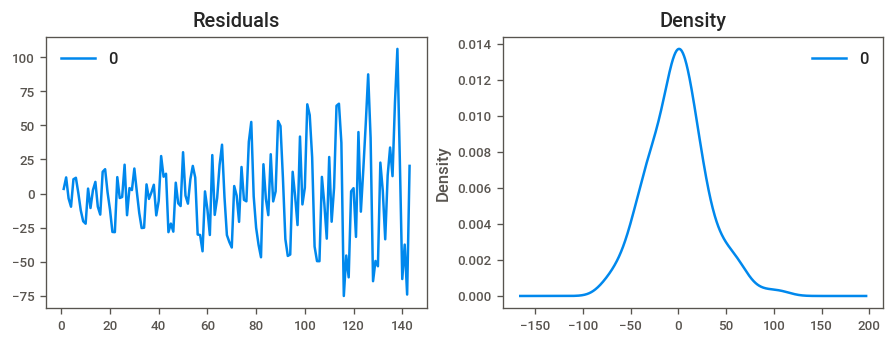

In [24]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

We can observe 0 mean and uinform variance.

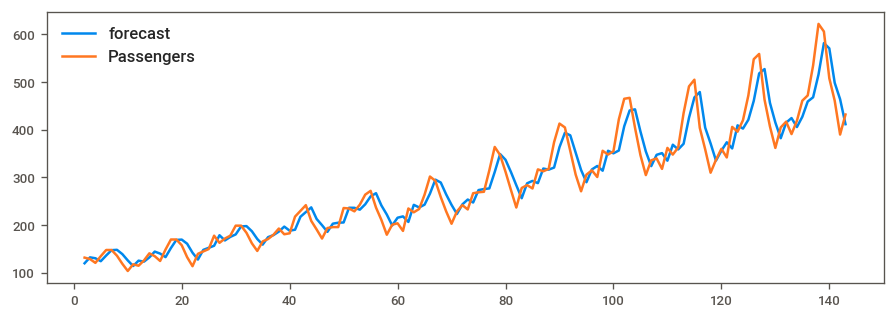

In [25]:
# Actual vs Fitted data
model_fit.plot_predict(dynamic=False)
plt.show()

The forecast and the actual values are close enough to conclude that it a good model.

## 8. Find the optimal ARIMA model manually using Out-of-Time Cross validation and comment on its MAPE

In [26]:
from statsmodels.tsa.stattools import acf

# Train test spolit
train = df.Passengers[:100]
test = df.Passengers[100:]

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -446.382
Method:                       css-mle   S.D. of innovations             21.660
Date:                Fri, 11 Jun 2021   AIC                            900.764
Time:                        07:25:12   BIC                            911.144
Sample:                             1   HQIC                           904.964
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3411      0.242      9.666      0.000       1.866       2.816
ar.L1.D.Passengers     0.7118      0.073      9.779      0.000       0.569       0.854
ma.L1.D.Passengers  

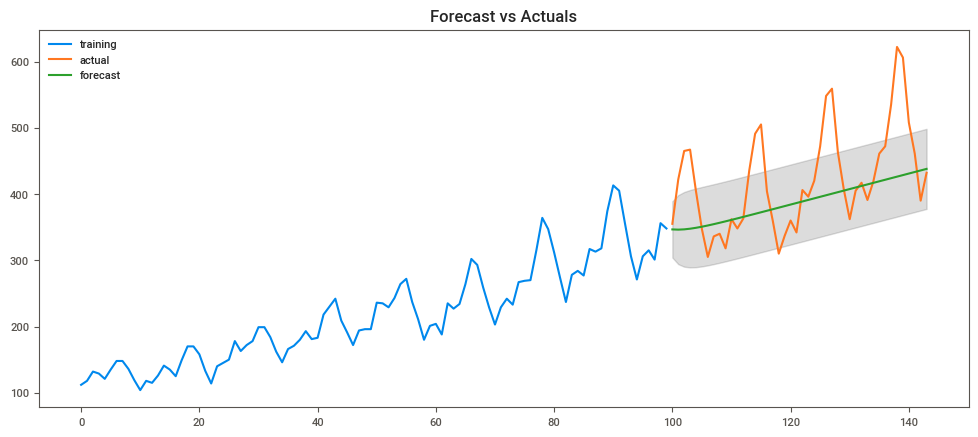

In [27]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
import numpy as np

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.1177720932710106,
 'me': -32.7468917716539,
 'mae': 54.148431887145556,
 'mpe': -0.05499207424626407,
 'rmse': 74.6453566145178,
 'acf1': 0.7231549880904627,
 'corr': 0.4942513487998838,
 'minmax': 0.11434575684519499}

                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                   99
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -437.074
Method:                       css-mle   S.D. of innovations             19.634
Date:                Fri, 11 Jun 2021   AIC                            886.148
Time:                        07:25:13   BIC                            901.718
Sample:                             1   HQIC                           892.448
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3223      0.206     11.300      0.000       1.919       2.725
ar.L1.D.Passengers     0.2476      0.193      1.285      0.199      -0.130       0.625
ar.L2.D.Passengers  

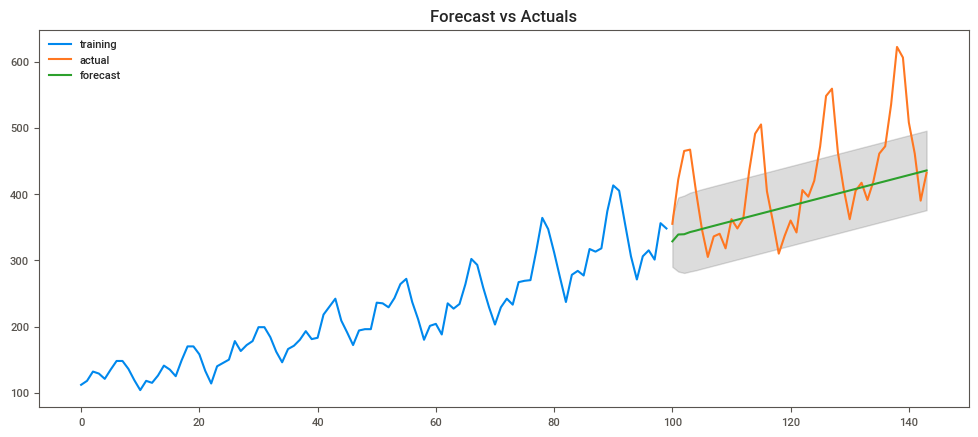

In [29]:
# Build Model
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AUC is less in 2nd ARIMA Model.

In [30]:
import numpy as np

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.1199657616911297,
 'me': -35.613022155331926,
 'mae': 55.285495870890394,
 'mpe': -0.062098311219954135,
 'rmse': 76.14020981576991,
 'acf1': 0.7288873728463107,
 'corr': 0.4835168034289268,
 'minmax': 0.11686721432996938}

First model 'mape': 0.1177720932710106
Second model 'mape': 0.1199657616911297
    
MAPE(11%) implies that the model precdicts atleat 89% in precting the next 44 predictions

## 9. Carry out an automatic ARIMA forecast so as to choose the best model that has the least AIC.

In [31]:
# ! pip install pmdarima

In [32]:
# ! pip install statsmodels

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd

df = pd.read_csv(url, header=0)
df = df.rename(columns={'#Passengers': 'Passengers'})

model_arima= pm.auto_arima(df.Passengers,trace=True, error_action='ignore', 
                           test='adf',start_p=1,start_q=1,max_p=5,max_q=5,d=None,
                   suppress_warnings=True,stepwise=False,seasonal=False)

print(model_arima.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1412.350, Time=0.33 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1391.773, Time=0.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.15 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1412.884, Time=0.32 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AI

ARIMA(1,0,4) model is the best we could find.

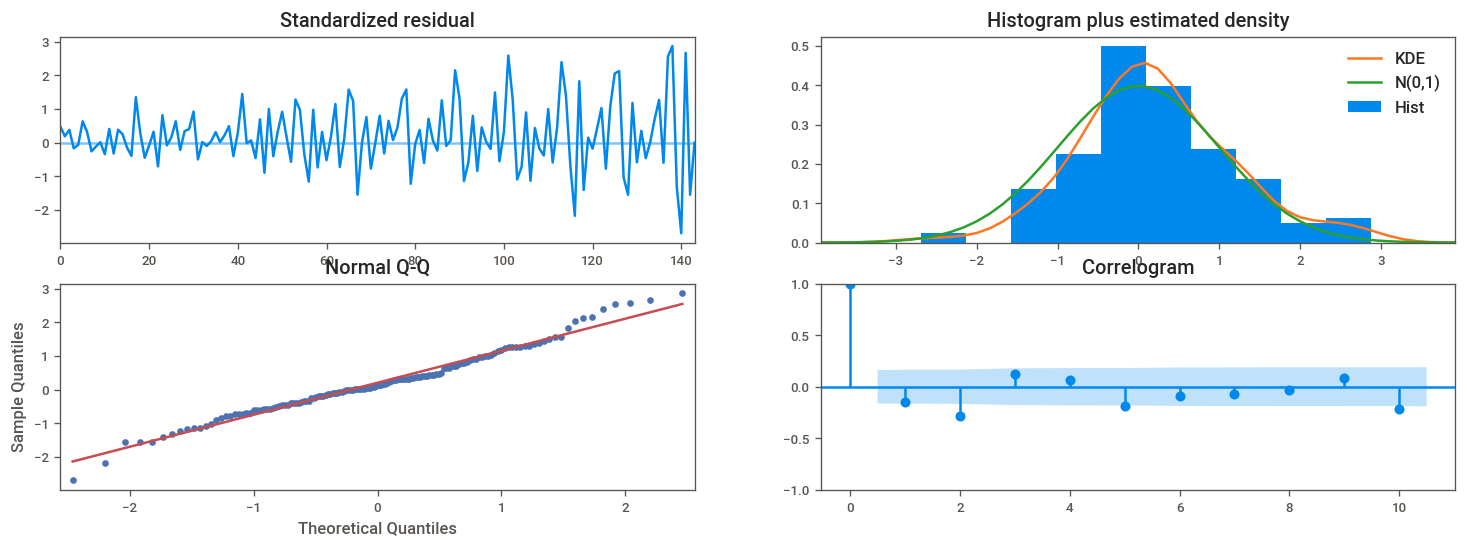

In [34]:
model_arima.plot_diagnostics(figsize=(15, 5))
plt.show()

## 10. Carry out a final forecast using the best ARIMA model so obtained above.

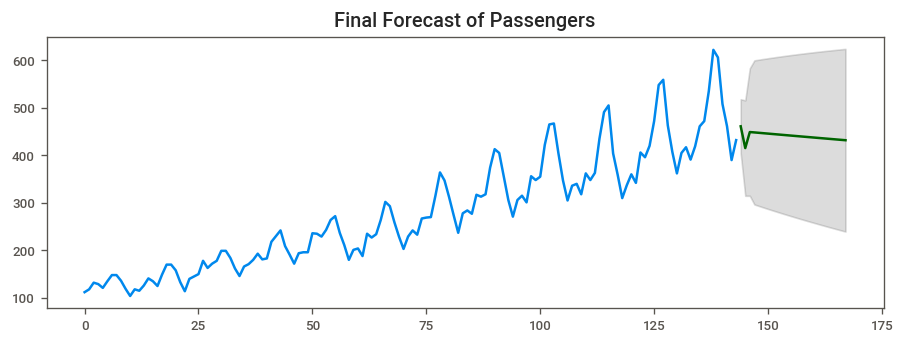

In [35]:
n_periods = 24

fc, confint = model_arima.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Passengers), len(df.Passengers)+n_periods)

fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(df.Passengers)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Passengers")
plt.show()

ARIMA(1,0,4) model is the best we could find with AUC 1391.773 using Auto ARIMA